In [1]:
import pandas as pd

In [2]:
file_path_train = "./archive/aug_train.csv"
file_path_test = "./archive/aug_test.csv"
file_path_ss = "./archive/sample_submission.csv"
hr_train = pd.read_csv(file_path_train) 
hr_test = pd.read_csv(file_path_test) 
hr_ss = pd.read_csv(file_path_ss) 

In [3]:
data = hr_train.drop("enrollee_id", axis=1)

In [4]:
data.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

# Outlier Detection with Standard Deviation

In [5]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['training_hours'].mean () + data['training_hours'].std () * factor
lower_lim = data['training_hours'].mean () - data['training_hours'].std () * factor

data_drop_outlier_std = data[(data['training_hours'] < upper_lim) & (data['training_hours'] > lower_lim)]

#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data_drop_outlier_std['city_development_index'].mean () + data_drop_outlier_std['city_development_index'].std () * factor
lower_lim = data_drop_outlier_std['city_development_index'].mean () - data_drop_outlier_std['city_development_index'].std () * factor

data_drop_outlier_std = data_drop_outlier_std[(data['city_development_index'] < upper_lim) & (data_drop_outlier_std['city_development_index'] > lower_lim)]

<ipython-input-5-04e6b64570b2>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_drop_outlier_std = data_drop_outlier_std[(data['city_development_index'] < upper_lim) & (data_drop_outlier_std['city_development_index'] > lower_lim)]


In [6]:
data_drop_outlier_std.shape

(18691, 13)

In [7]:
#Dropping the outlier rows with Percentiles
upper_lim = data['training_hours'].quantile(.95)
lower_lim = data['training_hours'].quantile(.05)

data_quantil = data[(data['training_hours'] < upper_lim) & (data['training_hours'] > lower_lim)]

#Dropping the outlier rows with Percentiles
upper_lim = data_quantil['city_development_index'].quantile(.95)
lower_lim = data_quantil['city_development_index'].quantile(.05)

data_quantil = data_quantil[(data_quantil['city_development_index'] < upper_lim) & (data_quantil['city_development_index'] > lower_lim)]

In [8]:
data_quantil.shape

(12378, 13)

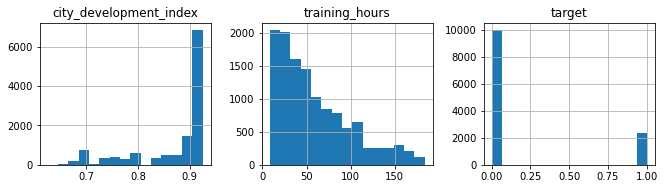

In [9]:
data_quantil.hist(bins=15, figsize=(15, 6), layout=(2, 4));

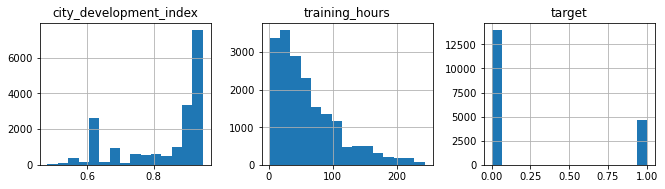

In [10]:
data_drop_outlier_std.hist(bins=15, figsize=(15, 6), layout=(2, 4));

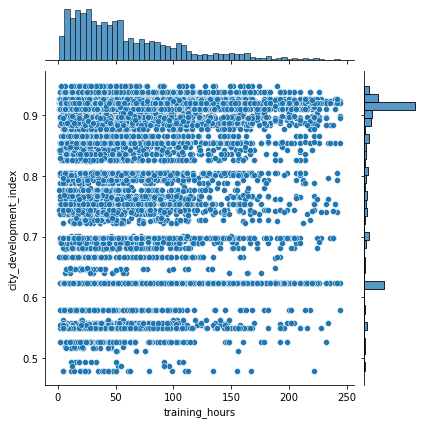

In [11]:
import seaborn as sns
sns.jointplot(x=data_drop_outlier_std['training_hours'], y=data_drop_outlier_std['city_development_index']);

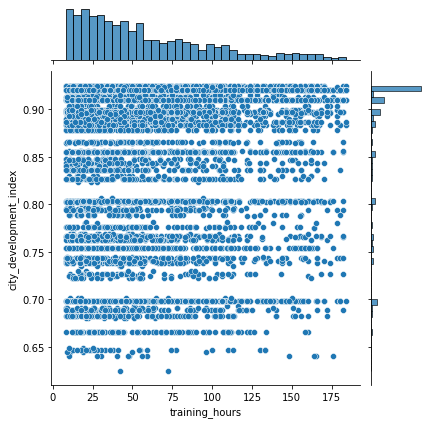

In [12]:
import seaborn as sns
sns.jointplot(x=data_quantil['training_hours'], y=data_quantil['city_development_index']);

Text(0, 0.5, 'Indice')

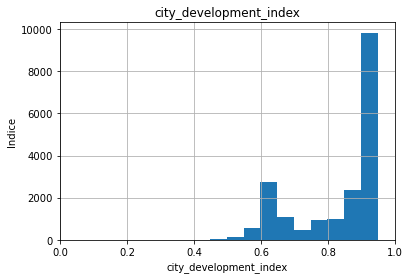

In [24]:
# Now, let's explore the income declared by the customers,
# that is, how much they earn yearly.

# this variable is also continuous

fig = hr_train['city_development_index'].hist(bins=10)

# for better visualisation, I display only specific
# range in the x-axis
fig.set_xlim(0, 1)

# title and axis legends
fig.set_title("city_development_index")
fig.set_xlabel('city_development_index')
fig.set_ylabel('Indice')

In [27]:
hr_train['training_hours'].dropna().unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

Text(0, 0.5, 'cant')

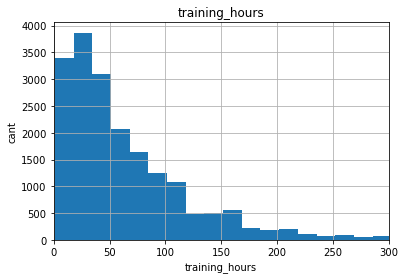

In [30]:
# let's make an histogram to get familiar with the
# distribution of the variable

fig = hr_train['training_hours'].hist(bins=20)

# for better visualisation, I display only specific
# range in the x-axis
fig.set_xlim(0, 300)

# title and axis legends
fig.set_title('training_hours')
fig.set_xlabel('training_hours')
fig.set_ylabel('cant')

In [31]:
hr_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [37]:
# The variable has as many different id values as customers,
# in this case 10000, 
f_cat = ["city",'gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
for i in f_cat:
    print("{} --- unicos:{}".format(i,len(data[i].dropna().unique())))

city --- unicos:123
gender --- unicos:3
relevent_experience --- unicos:2
enrolled_university --- unicos:3
education_level --- unicos:5
major_discipline --- unicos:6
experience --- unicos:22
company_size --- unicos:8
company_type --- unicos:6
last_new_job --- unicos:6


Text(0, 0.5, 'city')

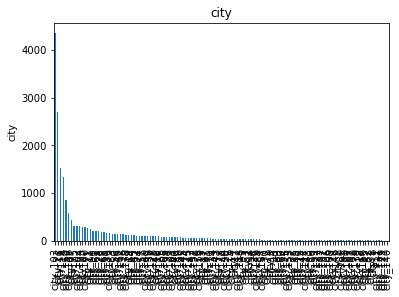

In [38]:
# Now, let's make a bar plot showing the different number of 
# borrowers for each of the values of the mixed variable

fig = hr_train["city"].value_counts().plot.bar()
fig.set_title('city')
fig.set_ylabel('city')

In [42]:
#hr_train[hr_train['enrolled_university'].isnull()]
hr_train[hr_train['education_level'].isnull()]


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,NaN,NaN,never,24,0.0
39,24659,city_71,0.884,Male,No relevent experience,no_enrollment,NaN,NaN,3,NaN,NaN,never,106,0.0
69,4830,city_90,0.698,NaN,No relevent experience,NaN,NaN,NaN,2,NaN,Pvt Ltd,never,228,1.0
136,3116,city_21,0.624,Male,No relevent experience,no_enrollment,NaN,NaN,3,NaN,NaN,1,24,0.0
153,8241,city_16,0.910,NaN,Has relevent experience,no_enrollment,NaN,NaN,11,NaN,NaN,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19091,16684,city_83,0.923,Male,No relevent experience,Full time course,NaN,NaN,2,NaN,NaN,1,77,1.0
19095,15806,city_165,0.903,NaN,No relevent experience,no_enrollment,NaN,NaN,3,NaN,Public Sector,never,62,0.0
19100,16368,city_65,0.802,NaN,No relevent experience,no_enrollment,NaN,NaN,4,NaN,NaN,2,304,0.0
19118,12211,city_126,0.479,NaN,No relevent experience,no_enrollment,NaN,NaN,1,NaN,NaN,never,316,1.0


## DEPENDENCIA DE NULEOS

Existe dependencias entre variables cuyo valor es nulo

In [43]:
#Existe

# customers who did not declare employment
t = hr_train[hr_train['education_level'].isnull()]
# percentage of missing data in time employed
t['major_discipline'].isnull().mean()

1.0

In [46]:
# customers who did not declare employment
t = hr_train[hr_train['education_level'].isnull()]
# percentage of missing data in time employed
t['company_size'].isnull().mean()

0.6652173913043479

In [48]:
f_nulos = ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

for i in f_nulos:
    print("**************************")
    for j in f_nulos:
        if i != j:
            # customers who did not declare employment
            t = hr_train[hr_train[i].isnull()]
            # percentage of missing data in time employed
            prom = t[j].isnull().mean()
            print("{} de {} el prom nan: {}".format(i,j,str(prom)))

**************************
gender de enrolled_university el prom nan: 0.03837622005323869
gender de education_level el prom nan: 0.04458740017746229
gender de major_discipline el prom nan: 0.18522626441881102
gender de experience el prom nan: 0.010869565217391304
gender de company_size el prom nan: 0.3604702750665484
gender de company_type el prom nan: 0.3786601597160603
gender de last_new_job el prom nan: 0.07741792369121561
**************************
enrolled_university de gender el prom nan: 0.4481865284974093
enrolled_university de education_level el prom nan: 0.25906735751295334
enrolled_university de major_discipline el prom nan: 0.4067357512953368
enrolled_university de experience el prom nan: 0.012953367875647668
enrolled_university de company_size el prom nan: 0.6139896373056994
enrolled_university de company_type el prom nan: 0.6269430051813472
enrolled_university de last_new_job el prom nan: 0.08549222797927461
**************************
education_level de gender el prom nan

In [49]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe

hr_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [50]:
hr_train.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [54]:
for i in f_nulos:
    print("**************  {}".format(i))
    print(hr_train[i].isnull().groupby(hr_train['target']).mean())

**************  gender
target
0.0    0.216883
1.0    0.290768
Name: gender, dtype: float64
**************  enrolled_university
target
0.0    0.018288
1.0    0.025748
Name: enrolled_university, dtype: float64
**************  education_level
target
0.0    0.024755
1.0    0.021771
Name: education_level, dtype: float64
**************  major_discipline
target
0.0    0.157430
1.0    0.114926
Name: major_discipline, dtype: float64
**************  experience
target
0.0    0.002921
1.0    0.004815
Name: experience, dtype: float64
**************  company_size
target
0.0    0.245324
1.0    0.504501
Name: company_size, dtype: float64
**************  company_type
target
0.0    0.261178
1.0    0.499058
Name: company_type, dtype: float64
**************  last_new_job
target
0.0    0.018705
1.0    0.032238
Name: last_new_job, dtype: float64


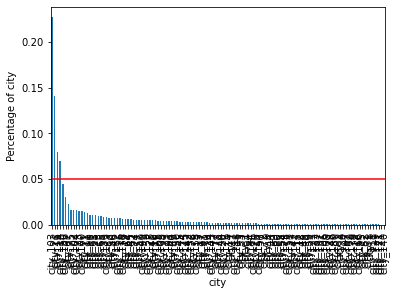

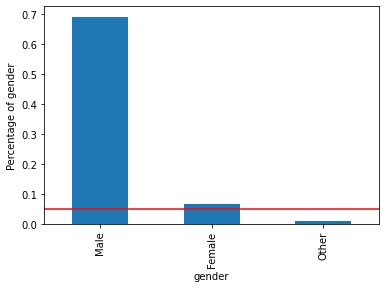

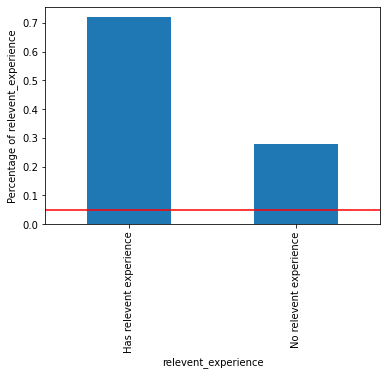

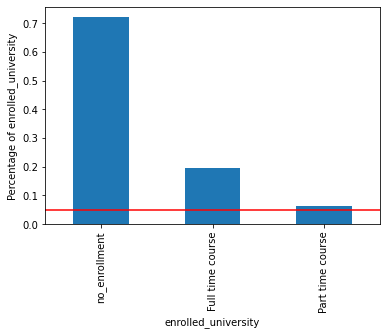

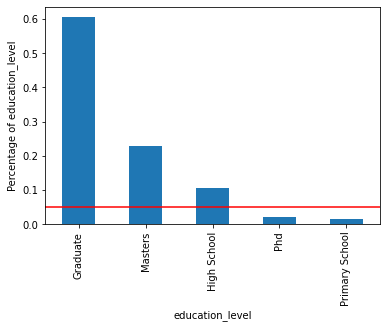

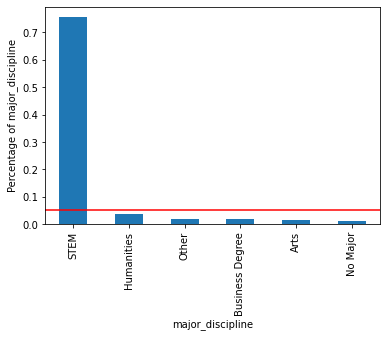

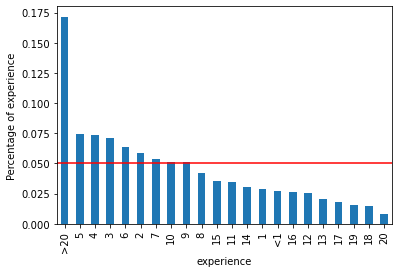

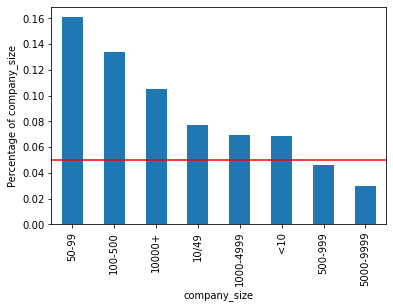

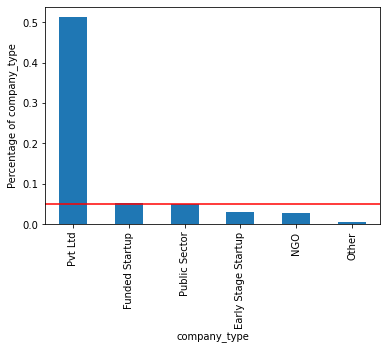

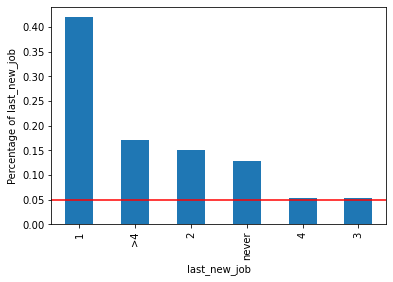

In [57]:
# let's plot how frequently each label
# appears in the dataset
import matplotlib.pyplot as plt
# in other words, the percentage of houses in the data
# with each label
data = hr_train.copy()
total_employes = len(data)

# for each categorical variable
for col in f_cat:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(data[col].value_counts() / total_employes)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of {}'.format(col))
    plt.show()

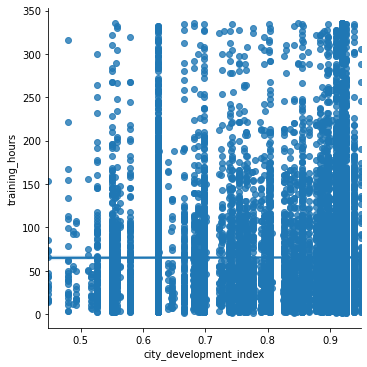

In [63]:
# and now NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres)

sns.lmplot(x="city_development_index", y="training_hours", data=data, order=1)

In [64]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

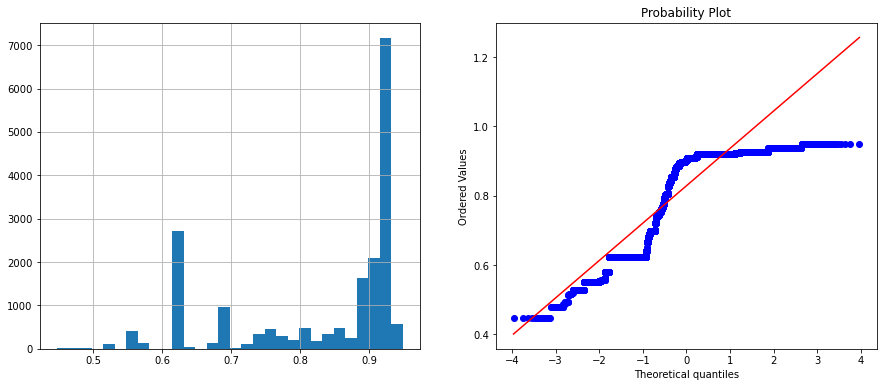

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

diagnostic_plots(data,"city_development_index")

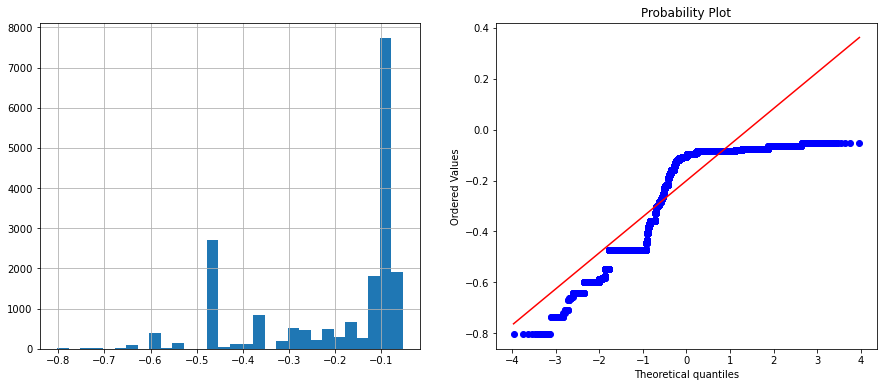

In [68]:
### Logarithmic transformation

data['city_development_index_log'] = np.log(data['city_development_index'])

diagnostic_plots(data, 'city_development_index_log')

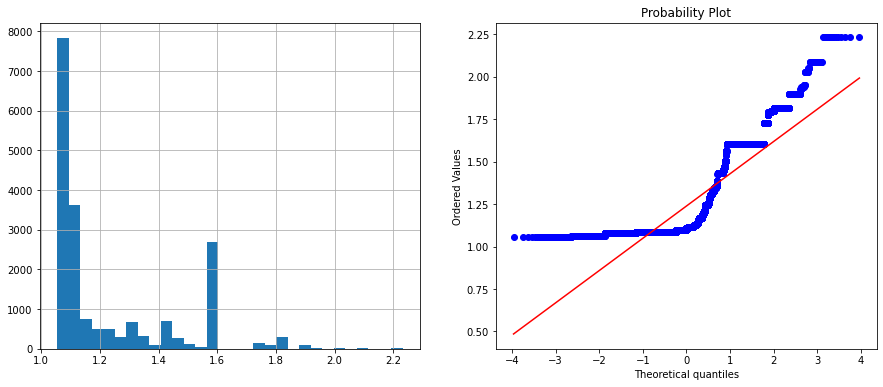

In [70]:
data['city_development_index_reciprocal'] = 1 / (data['city_development_index']) 

diagnostic_plots(data, 'city_development_index_reciprocal')

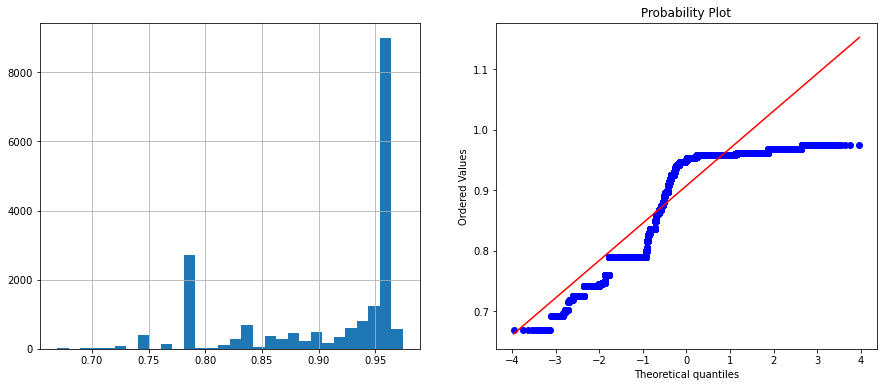

In [71]:
data['city_development_index_sqr'] = data['city_development_index']**(1/2) 

# np.power(data['GrLivArea'], 1/2), np.sqrt(data['GrLivArea'])

diagnostic_plots(data, 'city_development_index_sqr')

Optimal λ:  5.921288453928488


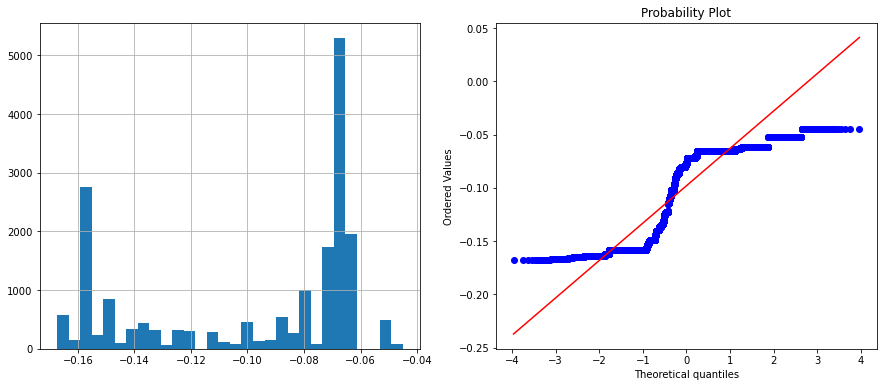

In [74]:
data['city_development_index_boxcox'], param = stats.boxcox(data['city_development_index']) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'city_development_index_boxcox')

Optimal λ:  13.251560574602495


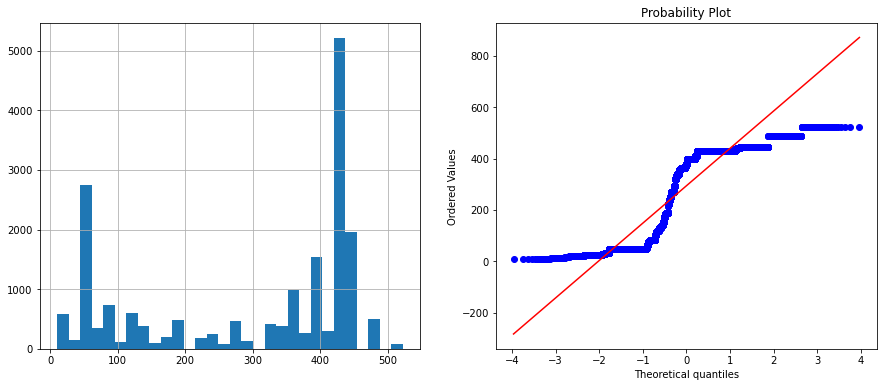

In [76]:
# to avoid a NumPy error

data['city_development_index'] = data['city_development_index'].astype('float')
data['city_development_index_yeojohnson'], param = stats.yeojohnson(data['city_development_index']) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'city_development_index_yeojohnson')

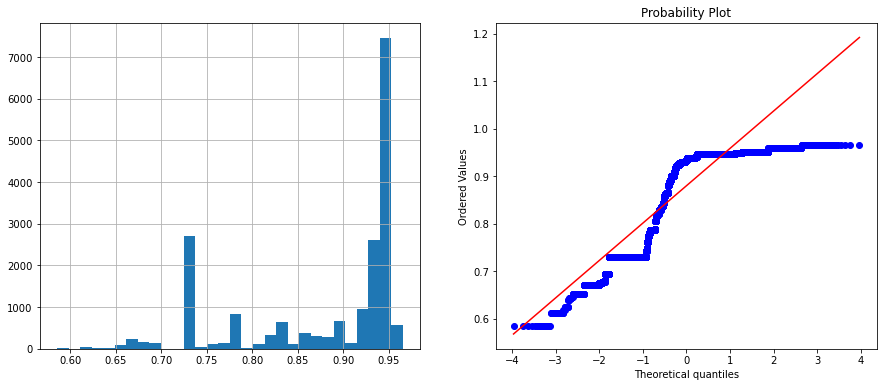

In [72]:
data['city_development_index_exp'] = data['city_development_index']**(1/1.5) # you can vary the exponent as needed

# np.power(data['GrLivArea'], any exponent we want)

diagnostic_plots(data, 'city_development_index_exp')

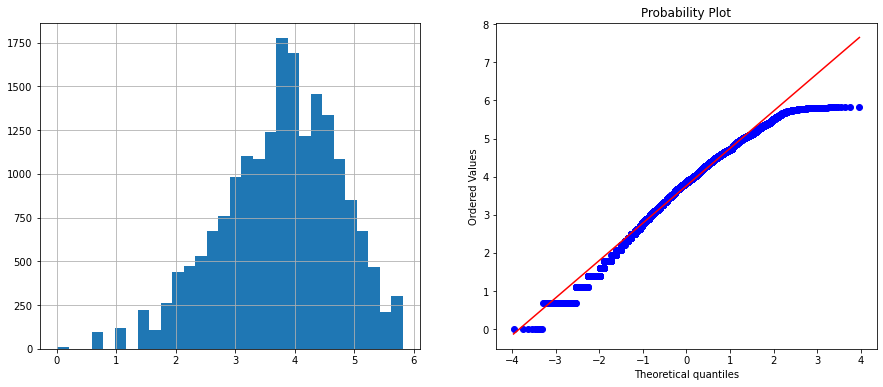

In [69]:
### Logarithmic transformation

data['training_hours_log'] = np.log(data['training_hours'])

diagnostic_plots(data, 'training_hours_log')

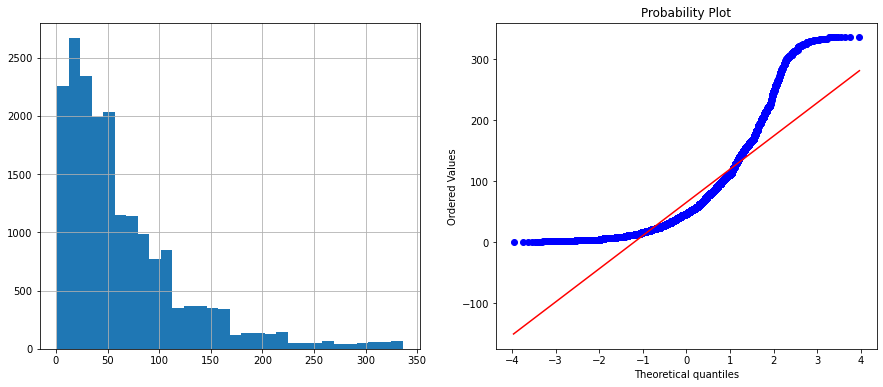

In [73]:
diagnostic_plots(data, 'training_hours')